In [28]:
import pandas as pd


# Pfad zur CSV-Datei
csv_file = 'wasserwerte_all.csv'

# CSV-Datei einlesen
data = pd.read_csv(csv_file, on_bad_lines='skip', sep=';')


In [29]:
empty_columns = data.columns[data.isnull().all()]
dropped_data = data.copy()
dropped_data.drop(empty_columns, axis=1, inplace=True)

In [30]:
dropped_data = dropped_data.dropna(thresh=100, axis=1)
column_counts = dropped_data.count().sort_values(ascending=False)
print(column_counts)

Datum / Uhrzeit                                   1072
Sauerstoff-Gehalt                                  955
Wassertemperatur                                   952
pH-Wert                                            948
Nitrat-Stickstoff                                  936
Ammonium-Stickstoff                                918
ortho-Phosphat-Phosphor                            913
Gesamt-Phosphor (P) gesamt                         854
Nitrit-Stickstoff                                  804
Leitfaehigkeit                                     779
Abfiltrierbare Stoffe                              767
Chlorid                                            765
Sulfat                                             585
Soaurekapazitat pH 4.3                             550
Sichttiefe                                         511
Chlorophyll-a                                      445
DOC (Geloester organischer Kohlenstoff)            441
Kaliumpermanganatverbrauch als O2                  436
Lufttemper

In [31]:
from sklearn.impute import KNNImputer
import numpy as np

filled_date = dropped_data.copy()
# Datums-Spalte ignorieren für Imputation
numeric_cols = filled_date.select_dtypes(include=[np.number]).columns

# KNN-Imputer initialisieren
imputer = KNNImputer(n_neighbors=5)

# Numerische Spalten auswählen und Imputation durchführen
filled_date[numeric_cols] = imputer.fit_transform(filled_date[numeric_cols])

filled_date.count().sort_values(ascending=False)

Datum / Uhrzeit                                   1072
Silicium geloest                                  1072
Sauerstoff-Gehalt                                 1072
pH-Wert                                           1072
Leitfaehigkeit                                    1072
Spektraler Absorptionskoeffizient (SAK) 254nm     1072
Kaliumpermanganatverbrauch als O2                 1072
Gluehverlust der abfiltrierbaren Stoffe           1072
BSB5 (Biochem. Sauerstoffbedarf. 5d)              1072
Gesamt-Stickstoff (N) gesamt                      1072
Gesamt-Stickstoff (N) geloest                     1072
Gesamt-Phosphor (P) gesamt                        1072
Abfiltrierbare Stoffe                             1072
Wassertemperatur                                  1072
Calcium                                           1072
Sulfat                                            1072
TOC (Organischer Kohlenstoff)                     1072
Soaurekapazitat pH 4.3                            1072
DOC (Geloe

In [32]:
def find_strongest_correlations(corr_matrix):
    strongest = pd.Series(index=corr_matrix.columns)
    for col in corr_matrix.columns:
        # Setzen Sie die Korrelation mit sich selbst auf Null, um sie auszuschließen
        corr_matrix.loc[col, col] = 0
        # Finden Sie die Spalte mit der höchsten Korrelation
        strongest[col] = corr_matrix[col].abs().idxmax()
    return strongest

In [ ]:
filled_date.to_csv('wasserwerte_filled.csv', sep=';', index=False)

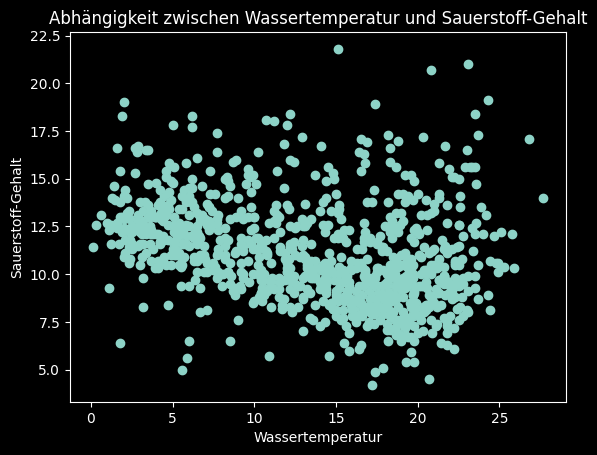

In [34]:
import matplotlib.pyplot as plt

plt.scatter(data['Wassertemperatur'], data['Sauerstoff-Gehalt'])
plt.xlabel('Wassertemperatur')
plt.ylabel('Sauerstoff-Gehalt')
plt.title('Abhängigkeit zwischen Wassertemperatur und Sauerstoff-Gehalt')
plt.show()